In [35]:
#import libs, load data

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_load = pd.read_csv('https://nthu-datalab.github.io/ml/labs/02_EDA_PCA/gen_dataset.csv')

X_load = df_load.drop('Class label', 1)
Y_load = df_load['Class label']

df_load.head()

,Class label,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
0,2.0,-0.016488,-1.310538,-1.552489,-0.785475,1.548429,0.476687,1.090010,-0.351870,-0.000855,-1.932941,0.499177,0.149137,-0.640413,-0.782951,-0.903561
1,0.0,-0.844201,-1.235142,-0.624408,1.502470,-0.079536,1.482053,1.178544,-1.150090,-1.040124,-1.041435,0.281037,-0.283710,-1.176802,0.718408,-0.392095
2,0.0,-0.181053,0.039422,-0.307827,0.162256,-1.283705,0.541288,0.019113,-0.470718,-1.045754,0.983150,-0.121205,-0.189225,-0.539178,0.825261,0.612889
3,2.0,-0.423555,-1.598754,1.597206,-0.239330,1.443564,2.657538,1.824393,-1.809287,1.058634,-4.058539,0.255908,-0.952422,-0.315551,1.854246,-2.369018
4,2.0,-0.499408,-0.814229,-0.178777,-1.757823,0.678134,3.552825,1.483069,-2.341943,2.155062,-4.380612,-0.239352,-1.730919,0.586125,3.902178,-2.891653


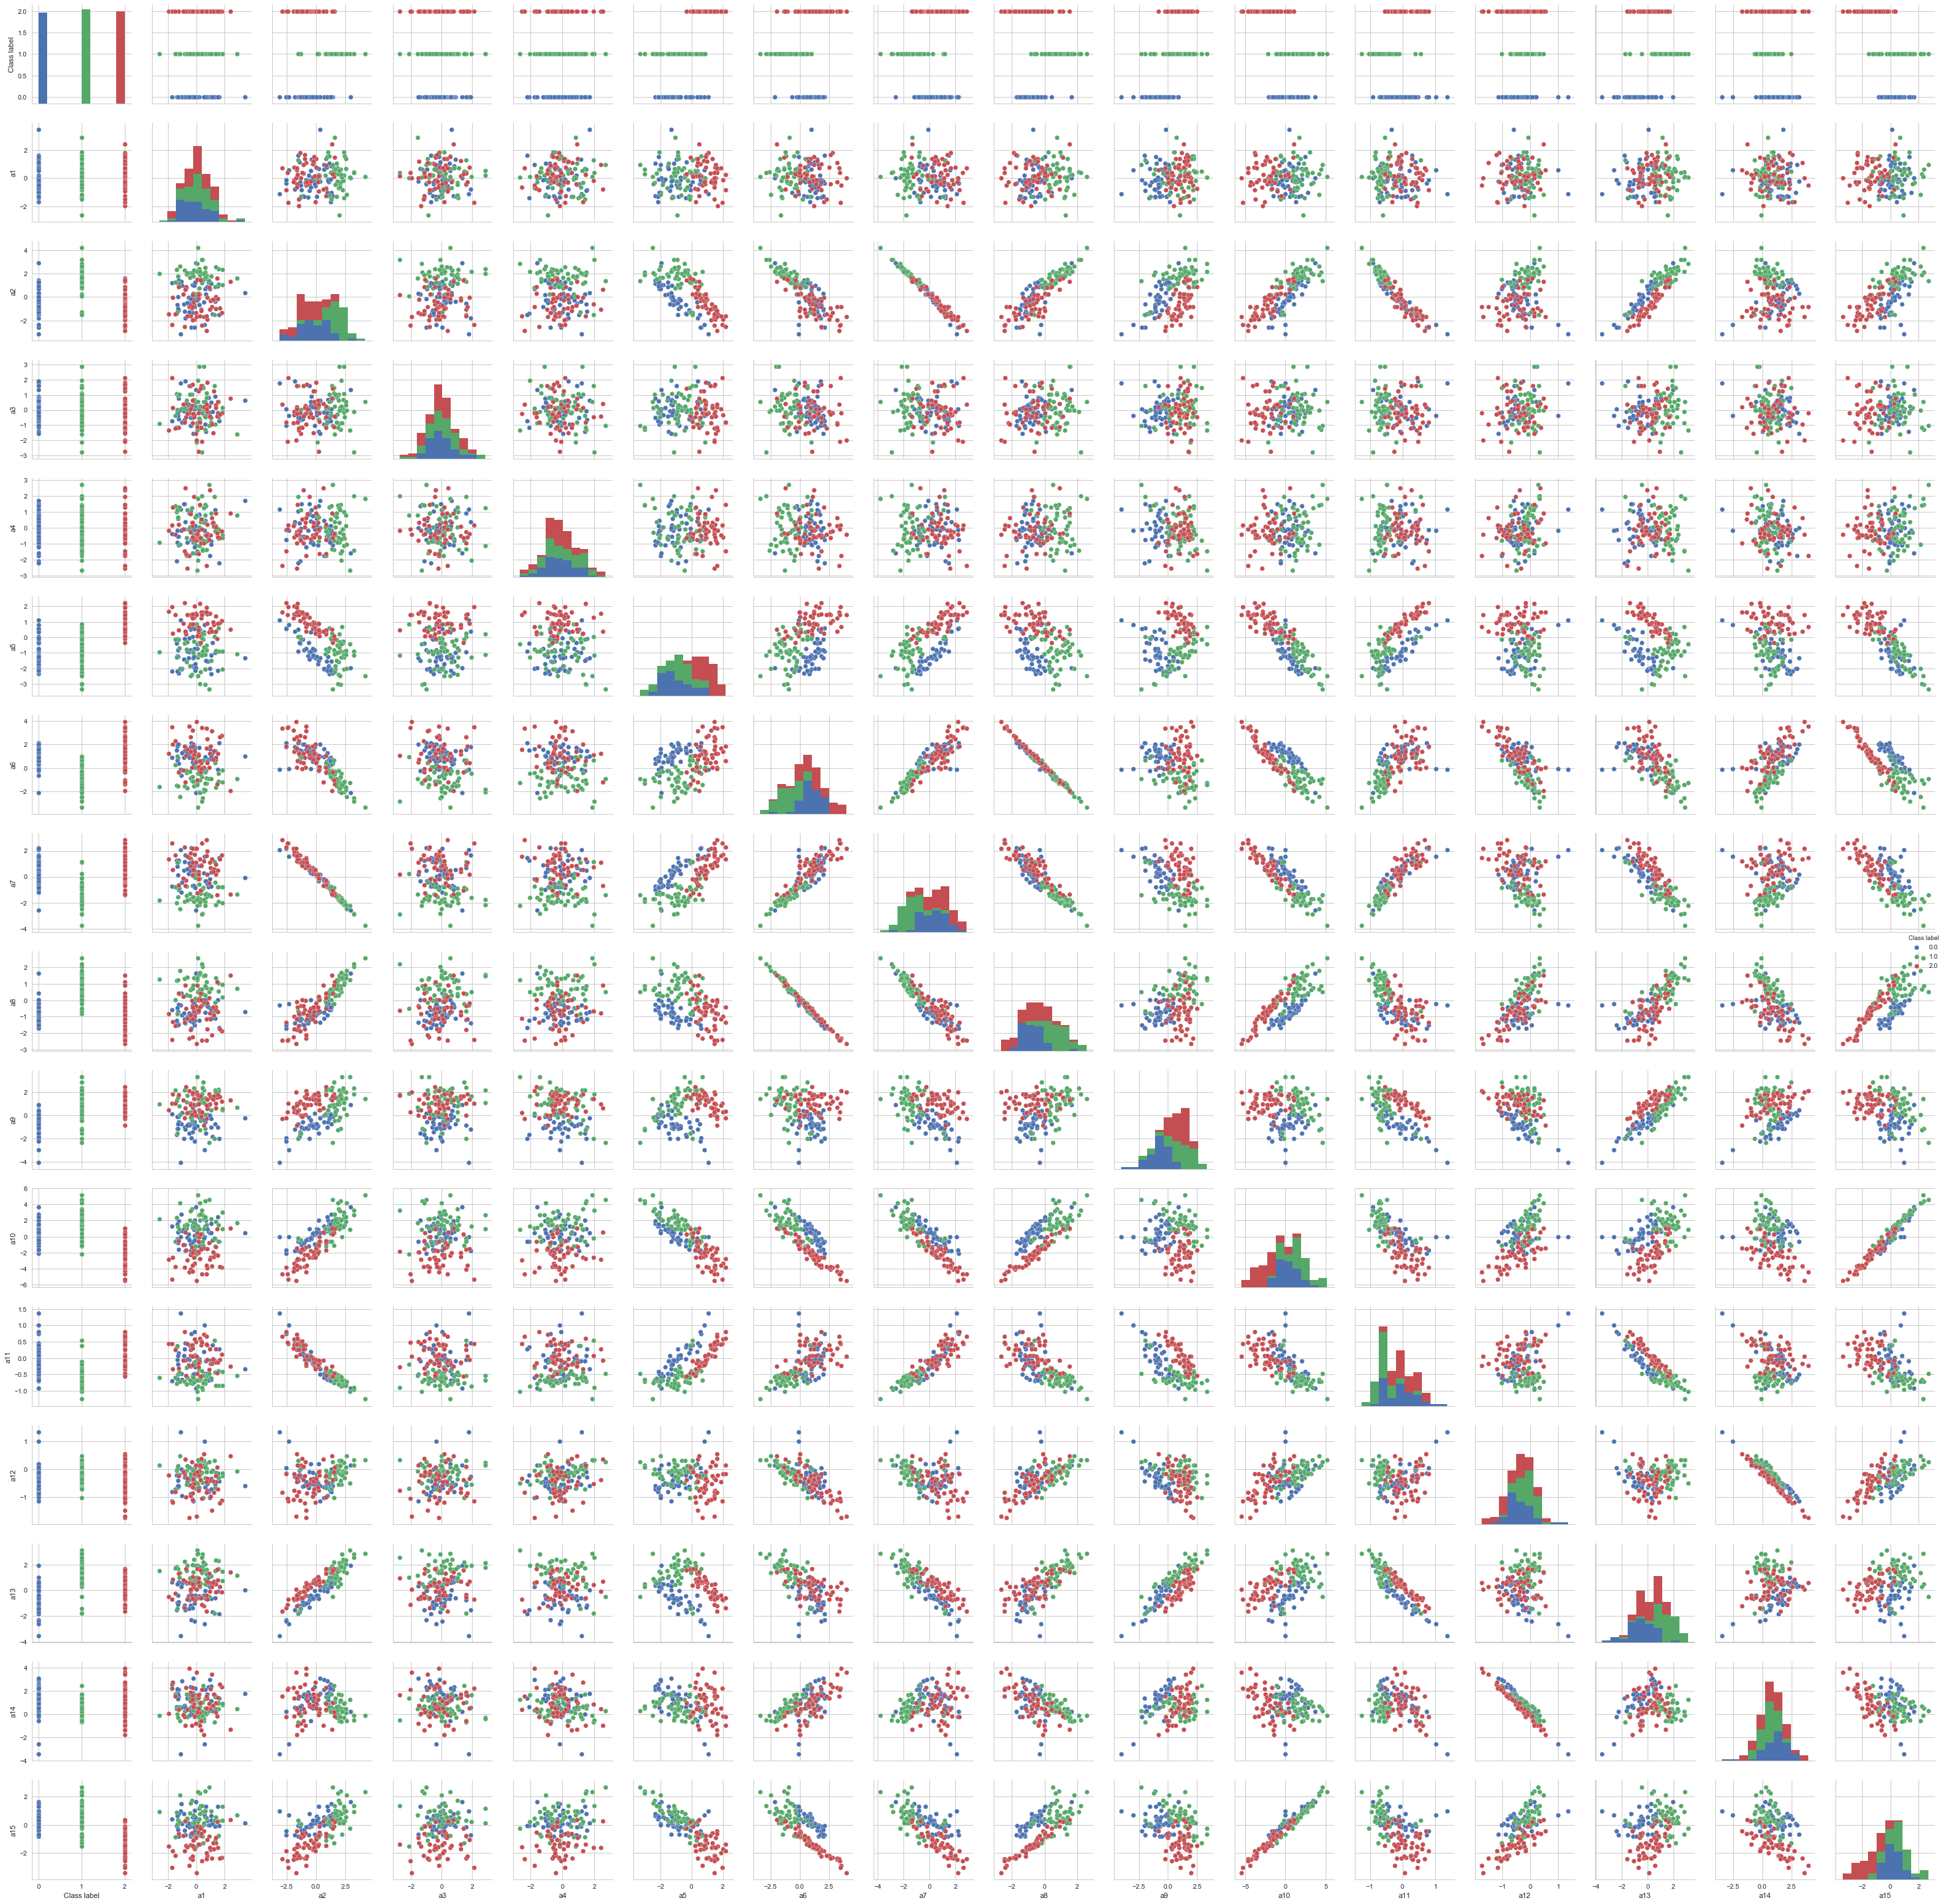

In [36]:
# inline plotting instead of popping out
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')


sns.pairplot(df_load, hue="Class label", size=2.5)
plt.tight_layout()

if not os.path.exists('./output'):
    os.makedirs('./output')
plt.savefig('./output/fig-lab2-scatter.png', dpi=300)
plt.show()

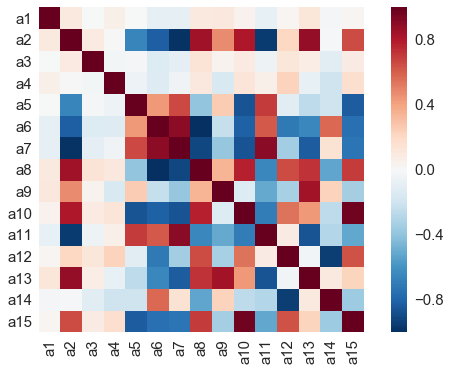

In [37]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X_load)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df_load.shape[0]

sns.set(font_scale=1.5)

ticklabels = [s for s in X_load.columns]

hm = sns.heatmap(R,
            cbar=True,
            square=True,
            yticklabels=ticklabels,
            xticklabels=ticklabels)

plt.tight_layout()
plt.savefig('./output/fig-lab2-corr.png', dpi=300)
plt.show()

sns.reset_orig()

In [38]:
#calculate the eigen values, eigen vectors
eigen_vals, eigen_vecs = np.linalg.eigh(R)

print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[ -1.23941344e-15  -9.76855436e-16  -5.43566212e-16  -4.01656426e-16
  -6.33993109e-17   2.47423300e-16   4.55207890e-16   7.04083944e-16
   1.26487911e-15   8.57167886e-01   9.53464088e-01   1.04802339e+00
   1.85367843e+00   3.04250181e+00   7.24516439e+00]


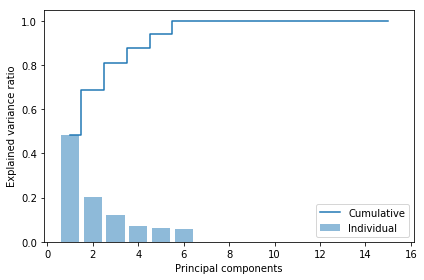

In [39]:
import matplotlib.pyplot as plt

tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./output/fig-lab2-var-exp.png', dpi=300)
plt.show()

In [40]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

In [41]:
#form the projection matrix
W_2D = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print('Projection matrix W_2D:\n', W_2D)

Projection matrix W_2D:
 [[-0.03680108  0.03981019]
 [-0.35344362  0.17546915]
 [-0.04693454 -0.03871644]
 [-0.03537068 -0.19318401]
 [ 0.25184127  0.00295837]
 [ 0.34790093  0.12034321]
 [ 0.36636513 -0.09402419]
 [-0.34839386 -0.0667711 ]
 [-0.09575583  0.44216239]
 [-0.34003746 -0.13435422]
 [ 0.30845714 -0.29936943]
 [-0.18057661 -0.46615457]
 [-0.27367566  0.34020897]
 [ 0.1020755   0.45099414]
 [-0.30387896 -0.247786  ]]


In [43]:
#form the projection matrix
W_3D = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                  eigen_pairs[1][1][:, np.newaxis],
                eigen_pairs[2][1][:, np.newaxis]))

print('Projection matrix W_3D:', W_3D)

Projection matrix W_3D: [[ -3.68010815e-02   3.98101886e-02   1.12149233e-01]
 [ -3.53443624e-01   1.75469148e-01  -1.54855864e-02]
 [ -4.69345371e-02  -3.87164432e-02   1.15504424e-01]
 [ -3.53706763e-02  -1.93184013e-01  -5.02034491e-04]
 [  2.51841266e-01   2.95837395e-03   5.37399708e-01]
 [  3.47900935e-01   1.20343211e-01  -2.01164217e-01]
 [  3.66365130e-01  -9.40241890e-02  -6.92304185e-03]
 [ -3.48393864e-01  -6.67711034e-02   2.35753812e-01]
 [ -9.57558272e-02   4.42162391e-01   4.19914765e-01]
 [ -3.40037462e-01  -1.34354220e-01  -2.38706399e-01]
 [  3.08457141e-01  -2.99369426e-01   1.38914486e-01]
 [ -1.80576614e-01  -4.66154573e-01   2.21961105e-01]
 [ -2.73675663e-01   3.40208969e-01   2.31444561e-01]
 [  1.02075497e-01   4.50994136e-01  -3.97382399e-01]
 [ -3.03878959e-01  -2.47786002e-01  -2.74946302e-01]]


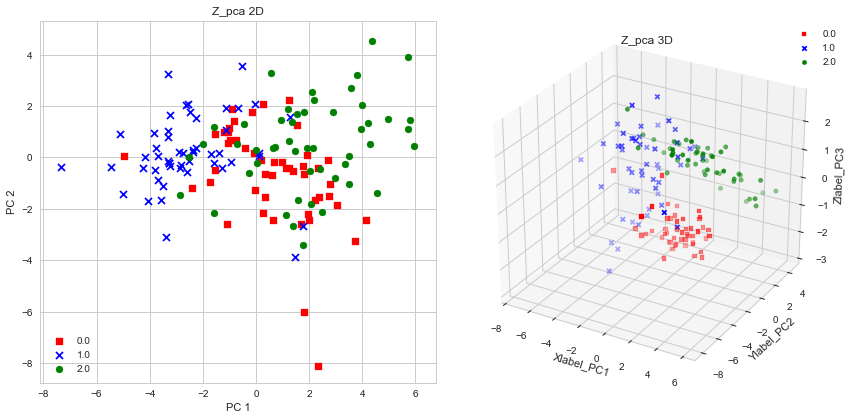

In [45]:
import os
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

#import Axes3D for plottin 3d scatter
from mpl_toolkits.mplot3d import Axes3D

#cacculate z_pca(2d and 3d)
Z_pca2 = Z.dot(W_2D)
Z_pca3 = Z.dot(W_3D)

#plot settings
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize=(12,6))

#plot 2D
plt2 = fig.add_subplot(1,2,1)
for l, c, m in zip(np.unique(Y_load), colors, markers):
    plt2.scatter(Z_pca2[Y_load==l, 0], 
                Z_pca2[Y_load==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca 2D')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

#plot 3D
plt3 = fig.add_subplot(1,2,2, projection='3d')
for l, c, m in zip(np.unique(Y_load), colors, markers):
    plt3.scatter(Z_pca3[Y_load==l, 0], 
                Z_pca3[Y_load==l, 1],
                Z_pca3[Y_load==l, 2],
                c=c, label=l, marker=m)

plt3.set_title('Z_pca 3D')
plt3.set_xlabel('Xlabel_PC1')
plt3.set_ylabel('Ylabel_PC2')
plt3.set_zlabel('Zlabel_PC3')
plt3.legend(loc='upper right')
    
#you should plot a 3D scatter using plt3.scatter here (see Axes3D.scatter in matplotlib)

if not os.path.exists('./output'):
    os.makedirs('./output')
plt.savefig('./output/fig-lab2-2-3-z.png', dpi=300)
plt.show()